# **CODESOFT**
#**Data Science - Internship**
# **Author : Afnan Ansari**
# **Task No 2 : Movie Rating Prediction**



*   *Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.*
*   *The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.*
*   *Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.*



### **Supervised Learning** -> Used Multiple Regression Models for Accuracy.
### **Best Suited Model** -> Random Forest Regressor

### **Dataset Link** => (https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies)


# **1) COLLECTING DATA**

***Importing All necessary Libraries***

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

***Loading Data***

In [ ]:
data = pd.read_csv('Movies.csv',encoding='latin-1')
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# **2) ANALYZING DATA**

In [ ]:
data.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


***Graph for Checking Null Values***

<Axes: >

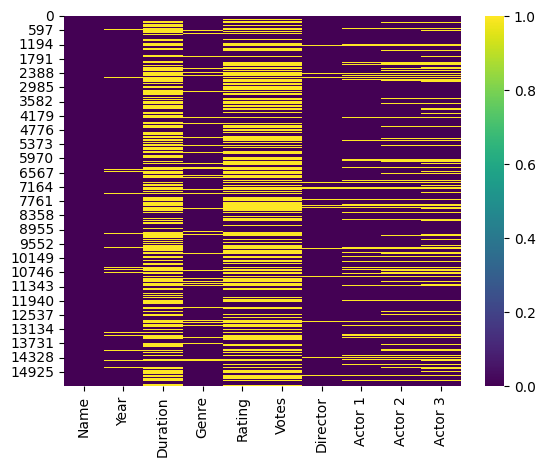

In [ ]:
sns.heatmap(data.isnull() , cmap = 'viridis')

***Garph For Checking the relation of Null Values on each other***



*   *The below heatmap shows that the values in rating and votes column both have the same null values*



<Axes: >

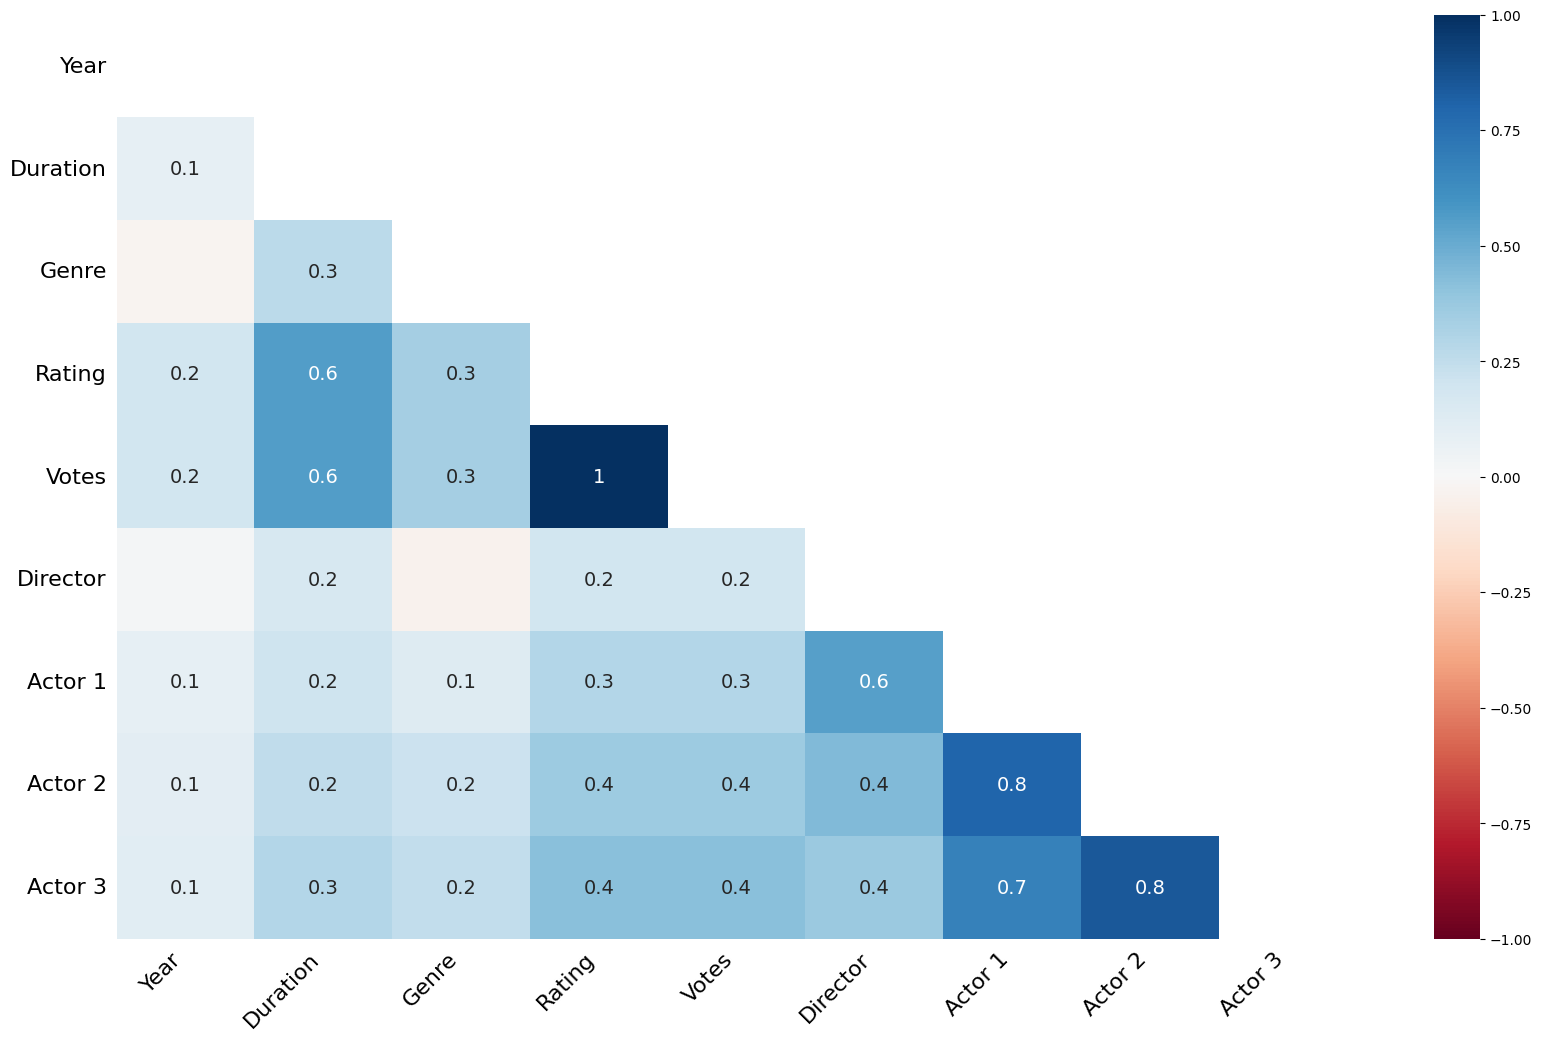

In [ ]:
msno.heatmap(data)

***Checking Unique Values***

In [ ]:
data.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

# **3) DATA WRANGLING**

***Code for Forward filling Null Values in Genre Column***

In [ ]:
# data['Genre'].fillna(method='ffill', inplace=True)  # Forward fill




***Dropping row having atleast 6 null values***

In [ ]:
data.dropna(thresh = 6)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15502,Zulm Ki Pukar,-1979.0,NaN,Action,NaN,NaN,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


***Dropping All Null values rows***

In [ ]:
data.dropna(inplace = True)
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,-2015.0,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,-2001.0,153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   float64
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), object(8)
memory usage: 486.3+ KB


***Checkinng Null Values After Cleaning.***

In [ ]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [ ]:
# data.Name.replace('', pd.NA, inplace=True)
# data.dropna(subset = ['Year'])



*   *Checking Duplicated Data*


In [ ]:
data.duplicated().sum()

0

In [ ]:
data[data.duplicated()]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3


*   *Cleaning Name column through Regular Expression*
*   *Cleaning all extra Characters and number expect Aplhabets*

In [ ]:
# data.Name = data.Name.str.replace('\d+', '')
data["Name"] = data["Name"].str.replace(r"[.,!?;%@#:()\-'1234567890]", "", regex=True).str.strip()

*   *Cleaning Duration column through Regular Expression*
*   *Cleaning all extra Aplhabets except int or float values*
*   *`Coerce` is used to ignore extra error*
*   *`Coerce` => means that if any errors occur during the conversion, pandas will replace those problematic values with NaN*





In [ ]:
data['Duration'] = data['Duration'].str.replace(' min', '', regex=False)
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')

*   *Cleaning `Year` column through Regular Expression*
*   *Cleaning all extra Aplhabets and dashes except int or float values*
*   *`Coerce` => means that if any errors occur during the conversion, pandas will replace those problematic values with NaN*

In [ ]:
data['Year'] = data['Year'].astype('str').str.replace('-', '', regex=False)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

*   *Cleaning `Votes` column*
*   *Cleaning all extra Commas and Spaces except int or float values*
*   *`Coerce` => means that if any errors occur during the conversion, pandas will replace those problematic values with NaN*

In [ ]:
data['Votes'] = data['Votes'].str.replace(',', '', regex=False).str.replace(' ', '', regex=False)
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')

*   *Cleaning `Genre` column*
*   *Replacing all the commas with Single Spacing*

In [ ]:
data['Genre'] = data['Genre'].str.replace(',', ' ', regex=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   float64
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 486.3+ KB


In [ ]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,Gadhvi He thought he was Gandhi,2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,Yaaram,2019.0,110,Comedy Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,Aur Pyaar Ho Gaya,1997.0,147,Comedy Drama Musical,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,Yahaan,2005.0,142,Drama Romance War,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,A Question Mark,2012.0,82,Horror Mystery Thriller,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


 # **4) EDA - EXPLORATORY DATA ANALYSIS**

**Note:**

*   *Insights of the visualizations is written below the graphs and plotings.*
*   *And insights of without visualized things are also written below the outputs.*
*   *And code explanation is written above the code cell*





***`.reset_index()` : Resetting Index of the Dataset***

In [ ]:
data = data.reset_index(drop = True)
data.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Gadhvi He thought he was Gandhi,2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,Yaaram,2019.0,110,Comedy Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,Aur Pyaar Ho Gaya,1997.0,147,Comedy Drama Musical,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,Yahaan,2005.0,142,Drama Romance War,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,A Question Mark,2012.0,82,Horror Mystery Thriller,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


***Scatterplot of Year wise Rating***

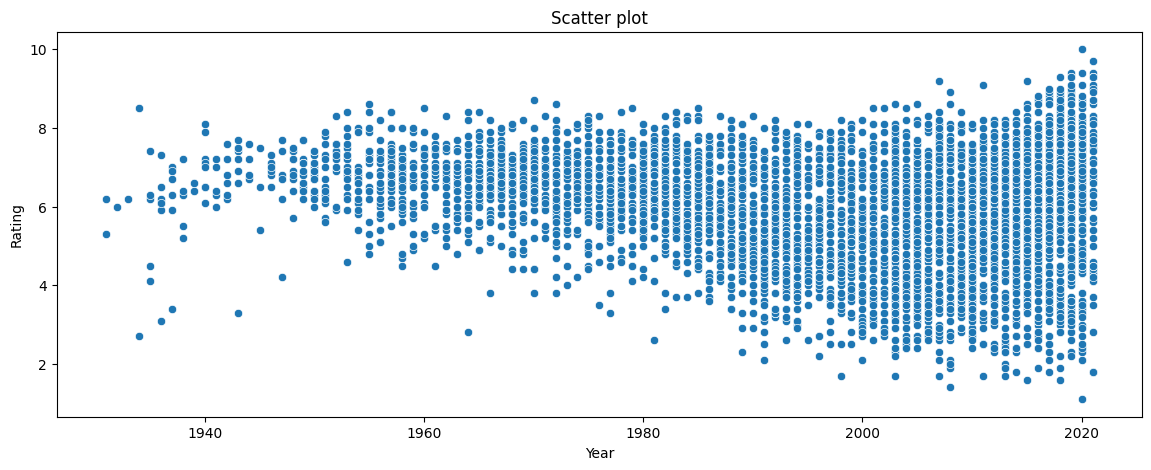

In [ ]:
plt.figure(figsize=(14, 5))
sns.scatterplot(data, x="Year", y="Rating")
plt.title("Scatter plot")
plt.show()

**Insights:**


1.   *Above Scaterplot shows that the most moves were created and rated after year 2000 which includes both high rating and low rating.*
2.   *And the very few movies were created and rated before 1940.*
3.   *As the time passed the number of movies created were increased.*

***`Line Graph` for Visualizing the Fluctuations of Rating Over the Years***

Text(0.5, 1.0, 'Line plot')

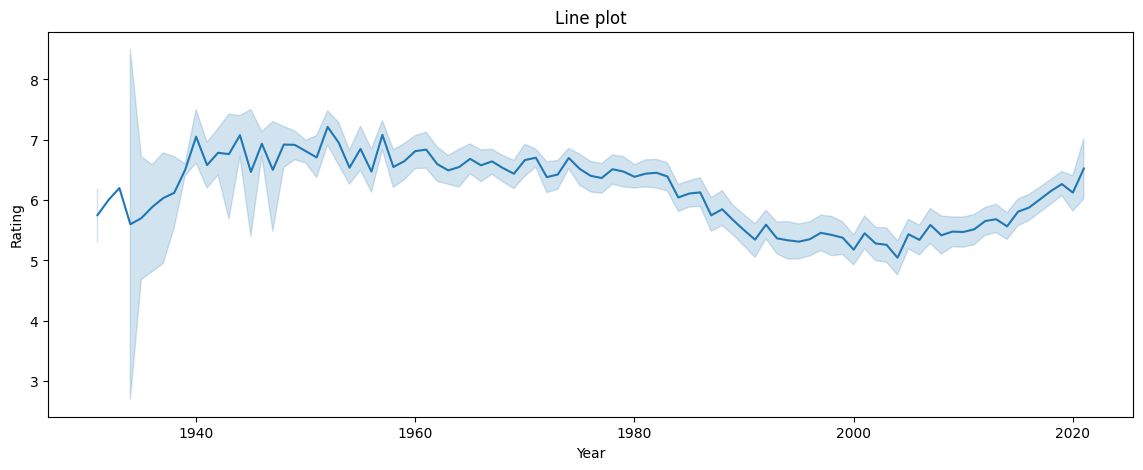

In [ ]:
plt.figure(figsize=(14, 5))
sns.lineplot(data, x="Year",  y="Rating" )
plt.title("Line plot")

<Axes: xlabel='Year', ylabel='count'>

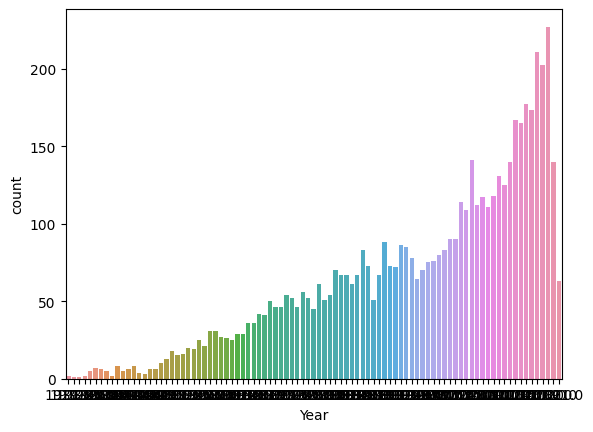

In [ ]:
sns.countplot(data, x = 'Year')

***Checking Null Values Through Heatmap after Droping All Nulls***

<Axes: >

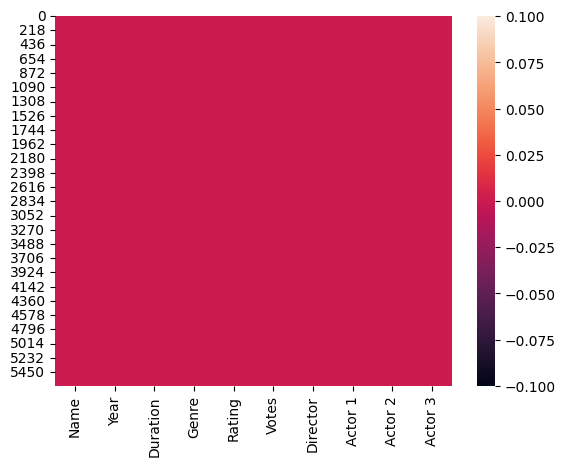

In [ ]:
sns.heatmap(data.isnull())



*   *Data Cleaned*



In [ ]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Gadhvi He thought he was Gandhi,2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,Yaaram,2019.0,110,Comedy Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,Aur Pyaar Ho Gaya,1997.0,147,Comedy Drama Musical,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,Yahaan,2005.0,142,Drama Romance War,7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,A Question Mark,2012.0,82,Horror Mystery Thriller,5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia




*   *`.assign()` : This is the method used to add or modify columns in a DataFrame.*
*   *`.split()` : is used to split the data of Genre column
 through the white spaces*
*   *`.explode()` : is used to transform Genre column having same data except with each element in the Genre list or array appearing in a separate row.*



In [ ]:
data = data.assign(Genre=data['Genre'].str.split())
data = data.explode('Genre')

***Each Row is separated according the Genre***

In [ ]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Gadhvi He thought he was Gandhi,2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,Yaaram,2019.0,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
1,Yaaram,2019.0,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,Aur Pyaar Ho Gaya,1997.0,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
2,Aur Pyaar Ho Gaya,1997.0,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


***Checking Unique Values in Director Column***

In [ ]:
data.Director.nunique()

2431

***Counting that how many movies were directed by specfic director through `.value_counts()`***

In [ ]:
director_counts = data['Director'].value_counts()
print(director_counts)

David Dhawan       103
Ram Gopal Varma     93
Mahesh Bhatt        87
Vikram Bhatt        80
Priyadarshan        74
                  ... 
Hemant Hegde         1
Rohit Dwivedi        1
K.C. Handra          1
Jitendra Chawda      1
Mozez Singh          1
Name: Director, Length: 2431, dtype: int64


**Insights:**
1.   *According to the data Most of the movies were Directed by the David Dhawan having count 103 movies*
2.  *Ram Gopal is the 2 and Mahesh Bhatt is the 3 director having most movies.*
3.   *Mozez Singh , Hemant Hegde , Rohit Dwivedi , Jitendra Chawda have directed only 1 movie which is the least movies count for any director in the data.*

***Checking Who were the actors and How many movies were acted by the specific actor in Actor 1 column through `.value_counts()`***

In [ ]:
Actor1_counts = data['Actor 1'].value_counts()
print(Actor1_counts)

Amitabh Bachchan    266
Akshay Kumar        213
Ashok Kumar         202
Dharmendra          195
Jeetendra           190
                   ... 
Yuvraj Kumar          1
Anmol Goswami         1
Amrityan              1
Bharat Chawla         1
Ajit Banerjee         1
Name: Actor 1, Length: 1960, dtype: int64


**Insights:**
1.   Actor having most Movies in Column `'Actor 1'` is Amitabh Bachcan with 266 Movies and Akshay Kumar is the Second actor with 213 Movies.
2.   Yuvraj Kumar, Anmil Goswami, Amrityan, BHarat Chawla and Ajit Banerjee is the actor with least Movies as Actor 1 having only 1 Movies.

***Checking Who were the actors and How many movies were acted by the specific actor in Actor 2 column through `.value_counts()`***

In [ ]:
Actor2_counts = data['Actor 2'].value_counts()
print(Actor2_counts)

Rekha              112
Hema Malini        103
Akshay Kumar        93
Juhi Chawla         83
Dharmendra          81
                  ... 
Sahil Bhati          1
Arif Khan            1
Ravi Khanvilkar      1
Shibana Dutta        1
Baby Vijaya          1
Name: Actor 2, Length: 2321, dtype: int64


**Insights:**
1.   Actor having most Movies in Column `'Actor 2'` is Rekha with 112 Movies and Hema Malini is the Second actor with 103 Movies.
2.   Baby Vijaya, Arif Khan, Ravi Khanvilkar, Sahil Bhati and Shibana Dutta is the actor with least Movies as Actor 2 having only 1 Movies.

***Checking Who were the actors and How many movies were acted by the specific actor in Actor column through `.value_counts()`***

In [ ]:
Actor3_counts = data['Actor 3'].value_counts()
print(Actor3_counts)

Pran                   122
Anupam Kher            120
Paresh Rawal            70
Prem Chopra             69
Amrish Puri             64
                      ... 
Gautmi                   1
Preeti Bhutani           1
Siddharth Chandekar      1
Ranjeet Jha              1
Shatakshi Gupta          1
Name: Actor 3, Length: 2556, dtype: int64


**Insights:**
1.   Actor having most Movies in Column `'Actor 3'` is Pran with 122 Movies and Anupam Kher is the Second actor with 120 Movies.
2.   Gautmi, Preeti Bhutani, Siddharth Chandekar, Rannjeet Jha and Shatakshi Gupta is the actor with least Movies as Actor 3 having only 1 Movies.



***Checking how manny `Genre` are there is dataset and Counts ofthose specific Genre through `.value_counts()`***

In [ ]:
genre_counts = data['Genre'].value_counts()

In [ ]:
print(genre_counts.sum())

11979


In [ ]:
print(genre_counts)

Drama          3796
Action         1686
Romance        1380
Comedy         1344
Crime           875
Thriller        679
Family          416
Musical         412
Mystery         304
Adventure       277
Horror          202
Fantasy         146
Biography       115
History          99
Music            53
Documentary      48
Sport            40
Animation        40
War              33
Sci-Fi           32
News              1
Western           1
Name: Genre, dtype: int64


**Insights:**
1.   *Most of the Movies have Genre Drama counting 3769*
2.   *Least count Genre is Western and News with only 1 Movie*



***Checking the Most Least Rated Movie through `.min()`***

In [ ]:
min_rating_rows = data[data['Rating'] == data['Rating'].min()]
min_rating_rows

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
4456,Sadak,2020.0,133,Action,1.1,67785,Mahesh Bhatt,Alia Bhatt,Priyanka Bose,Sanjay Dutt
4456,Sadak,2020.0,133,Drama,1.1,67785,Mahesh Bhatt,Alia Bhatt,Priyanka Bose,Sanjay Dutt


**Insights:**
1.   *Most Least Rated Movie was `Sadak` From Year 2020 with 1.1 rating out of 10.*



***Checking the Most Highest Rated Movie through `.max()`***

In [ ]:
max_rating_rows = data[data['Rating'] == data['Rating'].max()]
max_rating_rows

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3146,Love Qubool Hai,2020.0,94,Drama,10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
3146,Love Qubool Hai,2020.0,94,Romance,10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


**Insights:**
1.   *Most Highest Rated Movie was `Love Qubool Hai` From Year 2020 with 10 rating out of 10.*



***Checking the Most Least Voted Movie through `.minn()`***

In [ ]:
min_votes_rows = data[data['Votes'] == data['Votes'].min()]
min_votes_rows.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
460,Anmol Sitaare,1982.0,153,Drama,7.0,5,Geethapriya,Master Baboo,Rakesh Bedi,Ramesh Deo
543,Atal Faisla,2018.0,127,Drama,8.8,5,Abdul Sattar,Sahil Akhtar,Himayat Ali,Aman Jain
578,Awesome Mausam,2016.0,131,Romance,3.6,5,Yogesh Bharadwaj,Vaarssh Bhatnagar,Sunil Chaurasiyaa,Suhasini Mulay
591,B for Bundelkhand,2017.0,117,Drama,8.8,5,Vishal Mourya,Bharat Chawla,Nemi Chandra Jha,Moumita Nandi
835,BhaiBahen,1959.0,136,Drama,6.0,5,G.P. Sippy,Daisy Irani,Rajan Kapoor,Kathana


***Checking total Count Most Least rated Movies By Dropping Duplicated Movies through `drop_duplicates()` from Name Column***

In [ ]:
unique = min_votes_rows.drop_duplicates(subset=['Name'])
unique.count()

Name        37
Year        37
Duration    37
Genre       37
Rating      37
Votes       37
Director    37
Actor 1     37
Actor 2     37
Actor 3     37
dtype: int64

**Insights:**
1.   *Total Most Least Voted Movies are 37 with only 5 Votes*



***Checking the Most Highest Voted Movie through `.max()`***

In [ ]:
max_votes_rows = data[data['Votes'] == data['Votes'].max()]
max_votes_rows

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
3088,Life of Pi,2012.0,127,Adventure,7.9,591417,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain
3088,Life of Pi,2012.0,127,Drama,7.9,591417,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain
3088,Life of Pi,2012.0,127,Fantasy,7.9,591417,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain


**Insights:**
1.   *Total Most Highest Voted Movi is `Life Of Pie` with 591417 Votes*



In [ ]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Gadhvi He thought he was Gandhi,2019.0,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,Yaaram,2019.0,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
1,Yaaram,2019.0,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,Aur Pyaar Ho Gaya,1997.0,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
2,Aur Pyaar Ho Gaya,1997.0,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11979 entries, 0 to 5658
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  float64
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.0+ MB


# **5) VISUALIZING DATA**

***Genre Distribution By Percentage and PieChart***

In [ ]:
genre_counts / genre_counts.sum()*100

Drama          31.688789
Action         14.074631
Romance        11.520160
Comedy         11.219634
Crime           7.304449
Thriller        5.668253
Family          3.472744
Musical         3.439352
Mystery         2.537774
Adventure       2.312380
Horror          1.686284
Fantasy         1.218800
Biography       0.960013
History         0.826446
Music           0.442441
Documentary     0.400701
Sport           0.333918
Animation       0.333918
War             0.275482
Sci-Fi          0.267134
News            0.008348
Western         0.008348
Name: Genre, dtype: float64

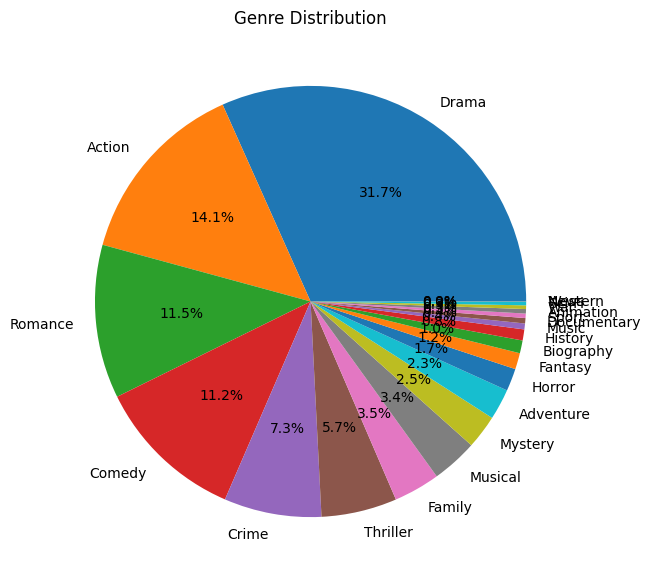

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title("Genre Distribution")
plt.show()

***Histogram Plot of Year wise Movies Count***

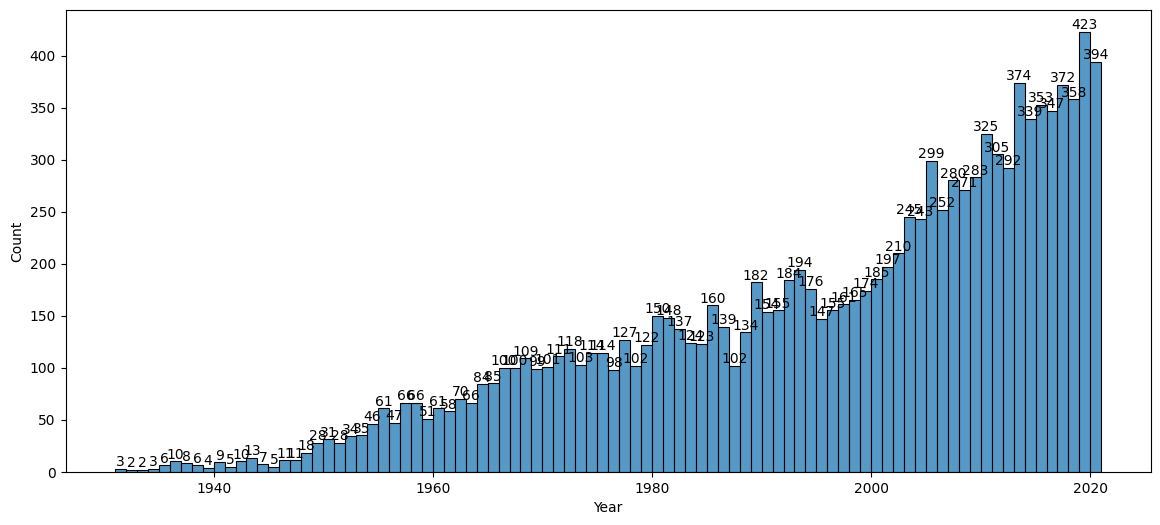

In [ ]:
plt.figure(figsize=(14, 6))
ax = sns.histplot(data, x=data['Year'], bins=90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

**Insights:**
1.   *Most of the movies were released in year 2019 having count 423*
2.   *Very least Movies were released in year 1934 and 1933 only 2 movies*.
3.   *Movies Count After year 2000 was increase drastically as compare to before 2000.*
4.   *Very Least movies were released in the time stamp 1940 > years*



***Checking Null Values annd Null Strings in Year Column***

In [ ]:
data.Year.isnull().sum()

0

In [ ]:
result = data[data['Year'] == '0']
result

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3


***Histogram Plot of Rating wise Movies Count***

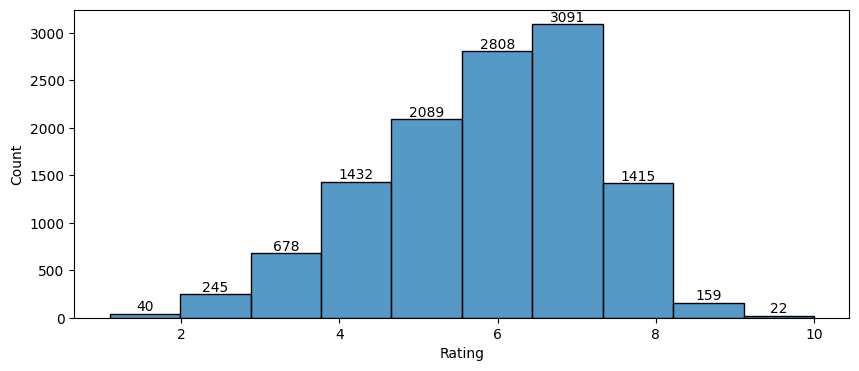

In [ ]:
plt.figure(figsize=(10, 4))
ax = sns.histplot(data, x=data['Rating'], bins=10)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

**Insights:**
1.   *Most of the movies were rated 7 having count 3091*
2.   *Only 22 Movies were Rated Between 9 and 10*.
3.   *Only 40 Movies were least Rated Movies. Rated Between 0 and 2.*


***Histogram Plot of Duration wise Movies Count***

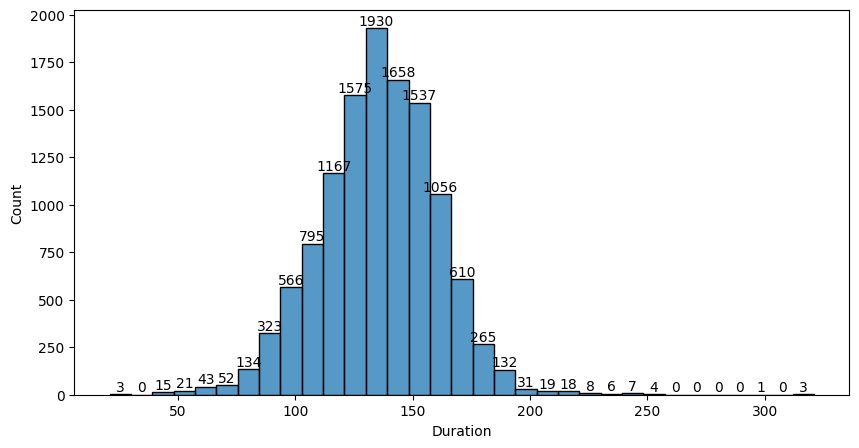

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data, x=data['Duration'], bins=33)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

**Insights:**
1.   *Highest movies count is in the duration 140 mints which is 1930*
2.   *Atleast 80% of the movies have the duration between 100 to 150 mints*.
3.   *Only 3 Movies were of 20 to 30 mints*
4.   *Highest Duration for any movie is 300+ mints having only 3 movies of this catagory.*


# **6) SCALING DATA TO NUMERIC**


*   ***`.astype('category')` used to convert data or specfic column to categorical datatype.***
*   ***Categorical data types are used to represent data with a limited number of unique values or categories efficiently***
*   ***`.cat.codes` is used to convert that categorical data to assign unique numerical value to each categorized data***
*  ***Scaling Catagorized string data to numeric values through `.astype('category').cat.codes`***



In [ ]:
data['Genre'] = data['Genre'].astype('category').cat.codes
data['Director'] = data['Director'].astype('category').cat.codes
data['Actor 1'] = data['Actor 1'].astype('category').cat.codes
data['Actor 2'] = data['Actor 2'].astype('category').cat.codes
data['Actor 3'] = data['Actor 3'].astype('category').cat.codes
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Gadhvi He thought he was Gandhi,2019.0,109,7,7.0,8,629,1352,2272,319
1,Yaaram,2019.0,110,4,4.4,35,1335,1198,719,2148
1,Yaaram,2019.0,110,16,4.4,35,1335,1198,719,2148
2,Aur Pyaar Ho Gaya,1997.0,147,4,4.7,827,1530,378,75,2045
2,Aur Pyaar Ho Gaya,1997.0,147,7,4.7,827,1530,378,75,2045


***Dropping Name Column through `drop()`***

In [ ]:
data = data.drop(['Name'] , axis = 1)
data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,2019.0,109,7,7.0,8,629,1352,2272,319
1,2019.0,110,4,4.4,35,1335,1198,719,2148
1,2019.0,110,16,4.4,35,1335,1198,719,2148
2,1997.0,147,4,4.7,827,1530,378,75,2045
2,1997.0,147,7,4.7,827,1530,378,75,2045


***Assigning Columns***

In [ ]:
Columns = ["Year" , "Duration" , "Genre" , "Rating" , "Votes" , "Director" , "Actor 1" , "Actor 2" , "Actor 3"]

***`.MinMaxScaler()` is used to scale numeric data  between 0 and 1***

In [ ]:
min_max_scaler = MinMaxScaler()
data[Columns] = min_max_scaler.fit_transform(data[Columns])
data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.977778,0.293333,0.333333,0.662921,0.000005,0.258848,0.690148,0.979310,0.124853
1,0.977778,0.296667,0.190476,0.370787,0.000051,0.549383,0.611536,0.309914,0.840705
1,0.977778,0.296667,0.761905,0.370787,0.000051,0.549383,0.611536,0.309914,0.840705
2,0.733333,0.420000,0.190476,0.404494,0.001390,0.629630,0.192956,0.032328,0.800391
2,0.733333,0.420000,0.333333,0.404494,0.001390,0.629630,0.192956,0.032328,0.800391


***Separating dependent and independent Column by assigning Independent Columns to X and Dependent Columns to Y***

In [ ]:
X = data.drop(['Rating'] , axis = 1)
Y = data['Rating']

#**7) SPLITTING DATA**

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y, test_size = 0.2 , random_state = 30)

In [ ]:
X_train

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
5596,0.600000,0.460000,0.333333,0.000162,0.528395,0.769270,0.890948,0.660274
3508,0.955556,0.416667,0.904762,0.015877,0.700412,0.862685,0.746552,0.046967
3278,0.988889,0.380000,0.333333,0.015162,0.500000,0.033691,0.075862,0.241487
4204,0.855556,0.336667,0.238095,0.000083,0.142387,0.541603,0.134914,0.561252
302,0.900000,0.510000,0.238095,0.038704,0.393827,0.313425,0.623276,0.759295
...,...,...,...,...,...,...,...,...
2280,0.700000,0.436667,0.761905,0.000563,0.288889,0.885145,0.744397,0.689237
430,0.722222,0.353333,0.000000,0.000042,0.083128,0.735579,0.895259,0.303718
244,0.700000,0.353333,0.761905,0.000002,0.671605,0.396631,0.119828,0.798043
2126,0.633333,0.416667,0.333333,0.000436,0.403704,0.939255,0.524138,0.758904


In [ ]:
X_test

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
5432,0.722222,0.356667,0.000000,0.000115,0.296296,0.883104,0.082759,0.104110
917,0.755556,0.460000,0.761905,0.009230,0.197531,0.389484,0.753448,0.084932
40,0.922222,0.273333,0.523810,0.000861,0.979012,0.748341,0.375431,0.333855
3862,0.822222,0.396667,0.333333,0.021511,0.069136,0.793772,0.683190,0.104110
2756,0.977778,0.250000,0.333333,0.000041,0.256379,0.677897,0.128879,0.063014
...,...,...,...,...,...,...,...,...
3333,0.988889,0.300000,0.761905,0.002218,0.533333,0.621235,0.446121,0.822701
4854,0.644444,0.420000,0.333333,0.000167,0.267901,0.207249,0.156466,0.343249
1539,0.888889,0.423333,0.904762,0.085271,0.244856,0.793772,0.247845,0.570646
5014,0.866667,0.313333,0.000000,0.000107,0.037037,0.845329,0.065517,0.987084


In [ ]:
Y_train

5596    0.471910
3508    0.696629
3278    0.606742
4204    0.258427
302     0.651685
          ...   
2280    0.471910
430     0.359551
244     0.325843
2126    0.573034
2782    0.494382
Name: Rating, Length: 9583, dtype: float64

In [ ]:
Y_test

5432    0.471910
917     0.516854
40      0.438202
3862    0.606742
2756    0.617978
          ...   
3333    0.528090
4854    0.584270
1539    0.674157
5014    0.325843
2366    0.528090
Name: Rating, Length: 2396, dtype: float64

In [ ]:
X_train.count()

Year        9583
Duration    9583
Genre       9583
Votes       9583
Director    9583
Actor 1     9583
Actor 2     9583
Actor 3     9583
dtype: int64

In [ ]:
X_test.count()

Year        2396
Duration    2396
Genre       2396
Votes       2396
Director    2396
Actor 1     2396
Actor 2     2396
Actor 3     2396
dtype: int64

In [ ]:
Y_train.count()

9583

In [ ]:
Y_test.count()

2396

#**8) MODEL SELECTION**

### 1.   Ridge Regression

In [ ]:
Ridge_regression_model = Ridge()
Ridge_regression_model.fit(X_train, Y_train)

Ridge()

### 2.   Lasso Regression

In [ ]:
Lasso_regression_model = Lasso()
Lasso_regression_model.fit(X_train, Y_train)

Lasso()

### 3.   Linear Regression

In [ ]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, Y_train)

LinearRegression()

### 4.   Random Forset Regression

In [ ]:
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, Y_train)

RandomForestRegressor()

### 5.   Support Vector Regression

In [ ]:
Support_vector_machine = SVR()
Support_vector_machine.fit(X_train, Y_train)

SVR()

### 6.   Gradient Boosting Regression

In [ ]:
gradient_boost_model = GradientBoostingRegressor()
gradient_boost_model.fit(X_train, Y_train)

GradientBoostingRegressor()

# **9) PREDICTIONS**

**1. Ridge Regression**

In [ ]:
ridge_regression_Y_predict = Ridge_regression_model.predict(X_test)
ridge_regression_Y_predict

array([0.52093614, 0.52299433, 0.50543121, ..., 0.57942319, 0.51260939,
       0.53115965])

**2. Lasso Regression**

In [ ]:
Lasso_regression_Y_predict = Lasso_regression_model.predict(X_test)
Lasso_regression_Y_predict

array([0.53775823, 0.53775823, 0.53775823, ..., 0.53775823, 0.53775823,
       0.53775823])

**3. Linear Regression**

In [ ]:
linear_regression_Y_predict = linear_regression_model.predict(X_test)
linear_regression_Y_predict

array([0.52014404, 0.52263447, 0.50510937, ..., 0.58959181, 0.51158789,
       0.52981468])

**4. Random Forest Regression**

In [ ]:
random_forest_regression_Y_predict = random_forest_model.predict(X_test)
random_forest_regression_Y_predict

array([0.42157303, 0.55168539, 0.39752809, ..., 0.64651685, 0.3788764 ,
       0.48595506])

**5. Support Vector Regression**

In [ ]:
SVR_Y_predict = Support_vector_machine.predict(X_test)
SVR_Y_predict

array([0.47400992, 0.52544647, 0.54179377, ..., 0.67101709, 0.40752601,
       0.46215005])

**6. Gradient Boosting Regression**

In [ ]:
gradient_boost_model_Y_predict = gradient_boost_model.predict(X_test)
gradient_boost_model_Y_predict

array([0.44541373, 0.58557154, 0.42939152, ..., 0.60806011, 0.40329364,
       0.42554279])

#**10) ACCURACY REPORT**

**1. Ridge Regression Accuracy**

In [ ]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, ridge_regression_Y_predict))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, ridge_regression_Y_predict))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, ridge_regression_Y_predict)))
print("Coefficient of Determination (R2 Score): ", metrics.r2_score(Y_test, ridge_regression_Y_predict))

Mean Absolute Error:  0.1187052827445963
Mean Squared Error:  0.021836181784653696
Root Mean Squared Error:  0.14777070678809687
Coefficient of Determination (R2 Score):  0.10870207442520563


**2. Lasso Regression Accuracy**

In [ ]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, Lasso_regression_Y_predict))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, Lasso_regression_Y_predict))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, Lasso_regression_Y_predict)))
print("Coefficient of Determination (R2 Score): ", metrics.r2_score(Y_test, Lasso_regression_Y_predict))

Mean Absolute Error:  0.12842912666538137
Mean Squared Error:  0.02451344200855341
Root Mean Squared Error:  0.15656769145821053
Coefficient of Determination (R2 Score):  -0.0005769427270856387


**3. Linear Regression Accuracy**

In [ ]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, linear_regression_Y_predict))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, linear_regression_Y_predict))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, linear_regression_Y_predict)))
print("Coefficient of Determination (R2 Score): ", metrics.r2_score(Y_test, linear_regression_Y_predict))

Mean Absolute Error:  0.11834497514532238
Mean Squared Error:  0.021717507279332585
Root Mean Squared Error:  0.14736861022392994
Coefficient of Determination (R2 Score):  0.11354606873952566



**4. Random Forest Regression Accuracy**

In [ ]:

print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, random_forest_regression_Y_predict))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, random_forest_regression_Y_predict))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, random_forest_regression_Y_predict)))
print("Coefficient of Determination (R2 Score): ", metrics.r2_score(Y_test, random_forest_regression_Y_predict))

Mean Absolute Error:  0.05329697435801245
Mean Squared Error:  0.007116837124281751
Root Mean Squared Error:  0.08436134852100072
Coefficient of Determination (R2 Score):  0.7095086390064779


**5. Support Vector Regression Accuracy**

In [ ]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, SVR_Y_predict))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, SVR_Y_predict))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, SVR_Y_predict)))
print("Coefficient of Determination (R2 Score): ", metrics.r2_score(Y_test, SVR_Y_predict))

Mean Absolute Error:  0.10862741276498512
Mean Squared Error:  0.019153515601433208
Root Mean Squared Error:  0.138396226832357
Coefficient of Determination (R2 Score):  0.21820174921699953


**6. Gradient Boosting Regression Accuracy**

In [ ]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test, gradient_boost_model_Y_predict))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test, gradient_boost_model_Y_predict))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test, gradient_boost_model_Y_predict)))
print("Coefficient of Determination (R2 Score): ", metrics.r2_score(Y_test, gradient_boost_model_Y_predict))

Mean Absolute Error:  0.09201803752343862
Mean Squared Error:  0.014731792794308267
Root Mean Squared Error:  0.12137459698927229
Coefficient of Determination (R2 Score):  0.39868533395373096
